<a href="https://colab.research.google.com/github/GerGer-projects/Projects/blob/main/Student_Stress_Level_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Kaggle Dataset:
https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/discussion/601131

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install scikit-optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from skopt.space import Real, Integer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Stress/StressLevelDataset.csv')
df.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

# **Data Exploration**

In [ ]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [ ]:
# No duplicates
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


In [ ]:
df.describe().T.sort_index()

count       mean       std  min   25%   50%  \
academic_performance          1100.0   2.772727  1.414594  0.0   2.0   2.0   
anxiety_level                 1100.0  11.063636  6.117558  0.0   6.0  11.0   
basic_needs                   1100.0   2.772727  1.433761  0.0   2.0   3.0   
blood_pressure                1100.0   2.181818  0.833575  1.0   1.0   2.0   
breathing_problem             1100.0   2.753636  1.400713  0.0   2.0   3.0   
bullying                      1100.0   2.617273  1.530958  0.0   1.0   3.0   
depression                    1100.0  12.555455  7.727008  0.0   6.0  12.0   
extracurricular_activities    1100.0   2.767273  1.417562  0.0   2.0   2.5   
future_career_concerns        1100.0   2.649091  1.529375  0.0   1.0   2.0   
headache                      1100.0   2.508182  1.409356  0.0   1.0   3.0   
living_conditions             1100.0   2.518182  1.119208  0.0   2.0   2.0   
mental_health_history         1100.0   0.492727  0.500175  0.0   0.0   0.0   
noise_level                   1100.0   2.649091  1.328127  0.0   2.0   3.0   
peer_pressure                 1100.0   2.734545  1.425265  0.0   2.0   2.0   
safety                        1100.0   2.737273  1.406171  0.0   2.0   2.0   
self_esteem                   1100.0  17.777273  8.944599  0.0  11.0  19.0   
sleep_quality                 1100.0   2.660000  1.548383  0.0   1.0   2.5   
social_support                1100.0   1.881818  1.047826  0.0   1.0   2.0   
stress_level                  1100.0   0.996364  0.821673  0.0   0.0   1.0   
study_load                    1100.0   2.621818  1.315781  0.0   2.0   2.0   
teacher_student_relationship  1100.0   2.648182  1.384579  0.0   2.0   2.0   

                               75%   max  
academic_performance           4.0   5.0  
anxiety_level                 16.0  21.0  
basic_needs                    4.0   5.0  
blood_pressure                 3.0   3.0  
breathing_problem              4.0   5.0  
bullying                       4.0   5.0  
depression                    19.0  27.0  
extracurricular_activities     4.0   5.0  
future_career_concerns         4.0   5.0  
headache                       3.0   5.0  
living_conditions              3.0   5.0  
mental_health_history          1.0   1.0  
noise_level                    3.0   5.0  
peer_pressure                  4.0   5.0  
safety                         4.0   5.0  
self_esteem                   26.0  30.0  
sleep_quality                  4.0   5.0  
social_support                 3.0   3.0  
stress_level                   2.0   2.0  
study_load                     3.0   5.0  
teacher_student_relationship   4.0   5.0

Checking for Outliers

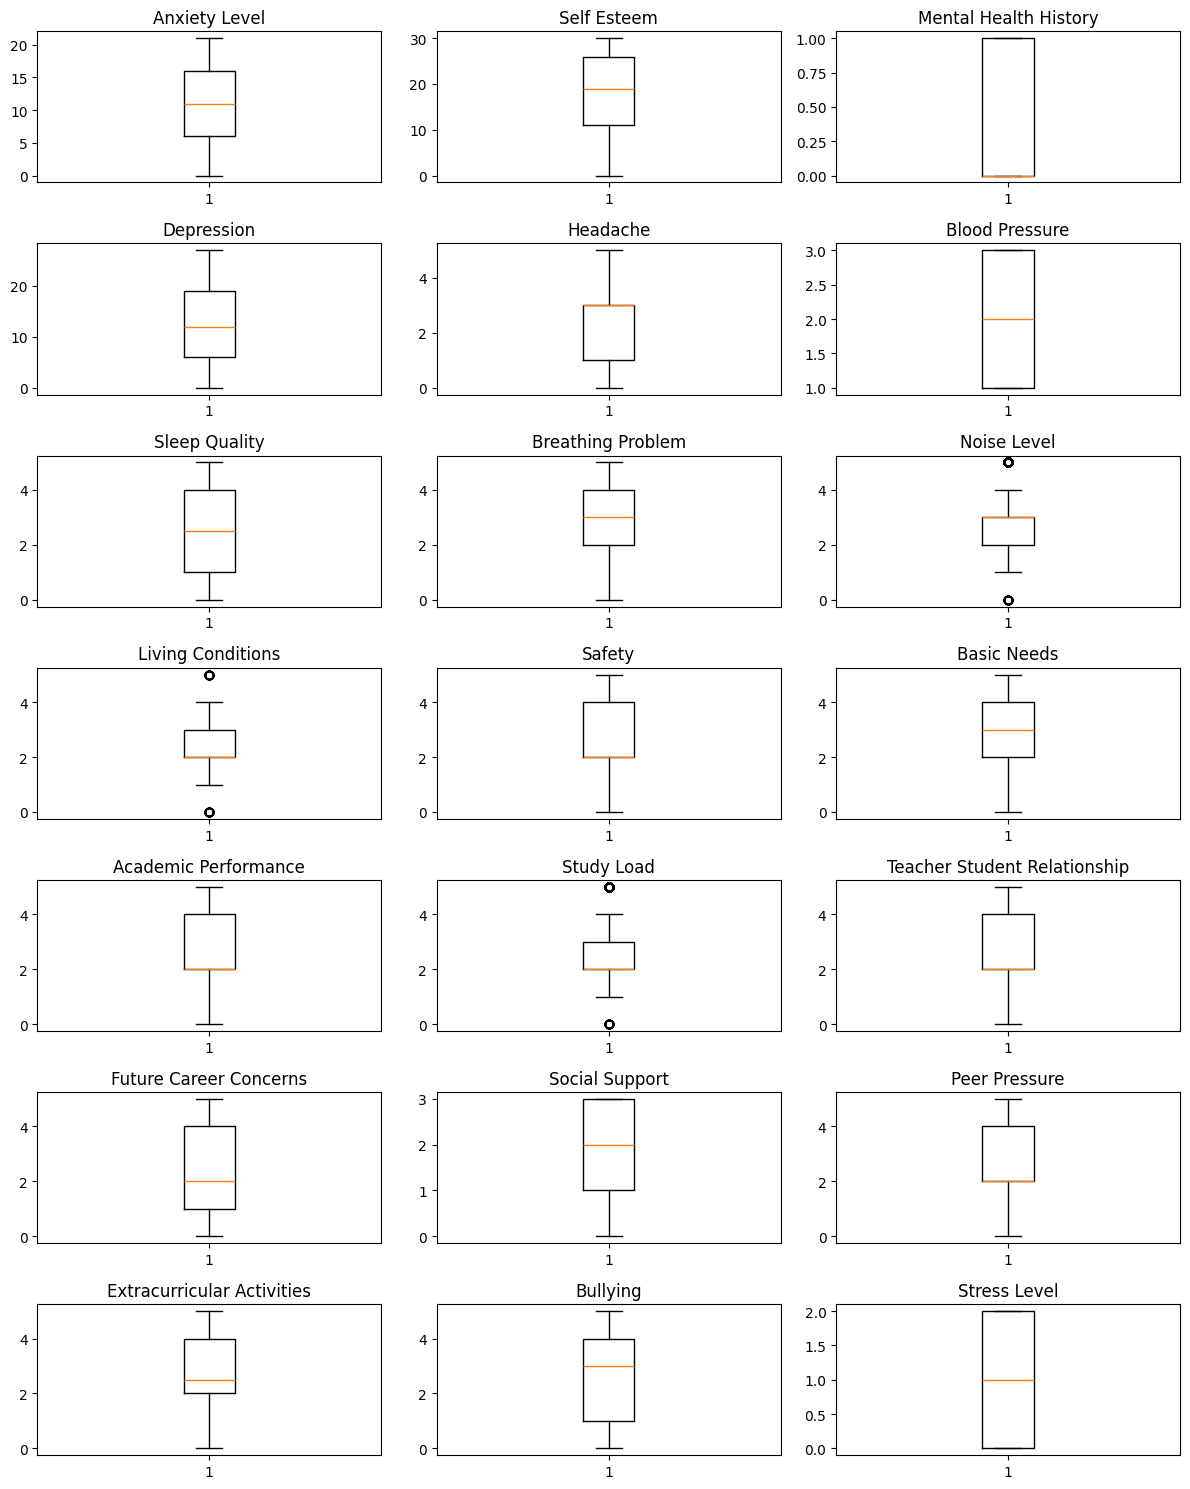

In [ ]:
cols = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression','headache','blood_pressure','sleep_quality','breathing_problem','noise_level','living_conditions','safety','basic_needs',
        'academic_performance','study_load','teacher_student_relationship','future_career_concerns','social_support','peer_pressure','extracurricular_activities','bullying','stress_level']

fig, axes = plt.subplots(7, 3, figsize=(12, 15))

axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.boxplot(df[col])
    ax.set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


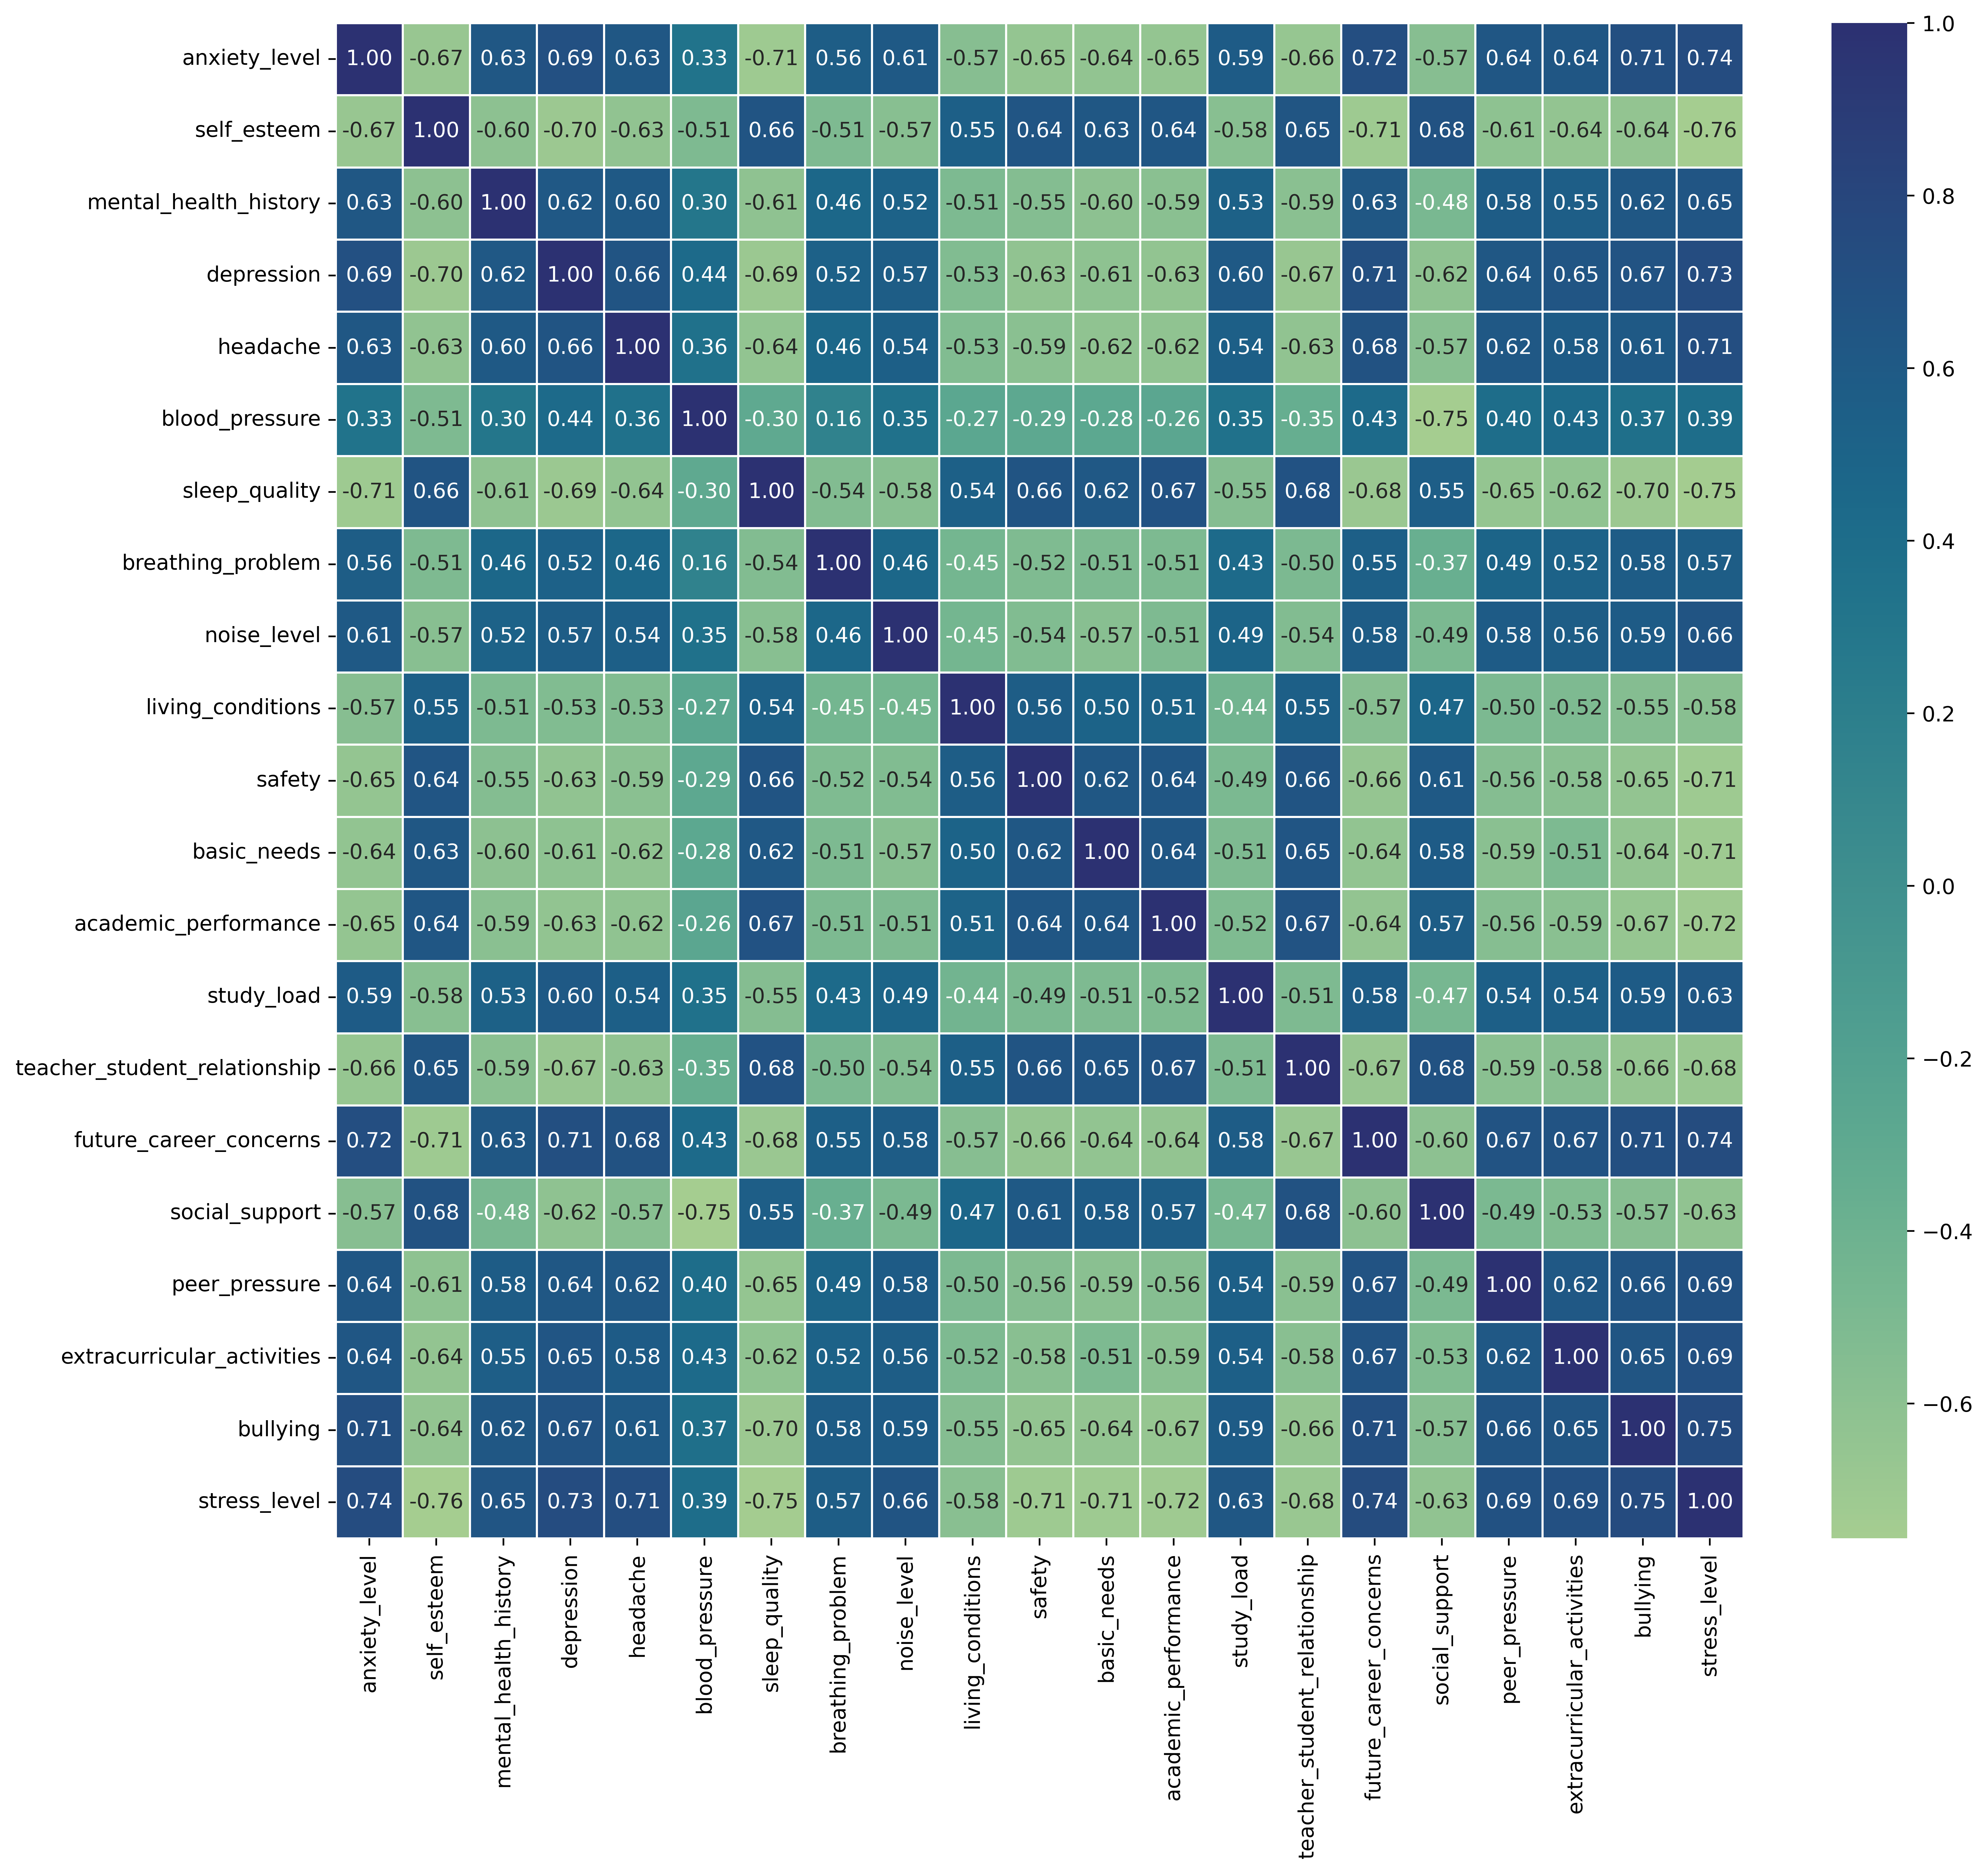

In [ ]:
# Find the pearson correlations matrix
corr = df.corr(method = 'pearson')
plt.figure(figsize=(15,13), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=1, cmap="crest")
plt.show()

Unique target values: [1 2 0]

Stress level distribution:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64


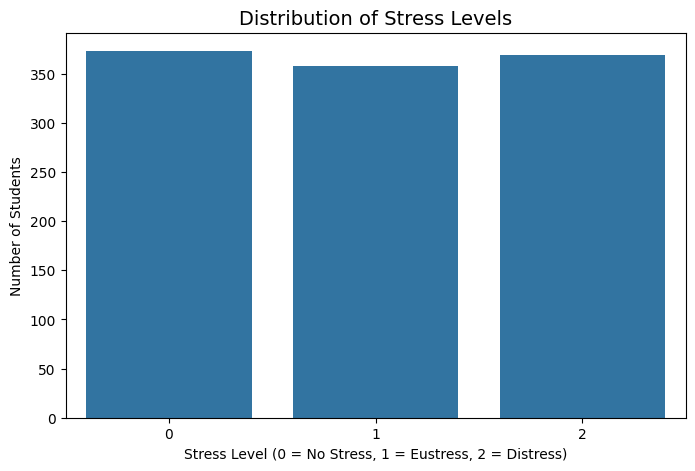

In [ ]:
# 🔎 Check unique values in the target column
print("Unique target values:", df['stress_level'].unique())

# 📊 Value counts
stress_counts = df['stress_level'].value_counts().sort_index()
print("\nStress level distribution:")
print(stress_counts)

# 📉 Plot class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=stress_counts.index, y=stress_counts.values)
plt.title("Distribution of Stress Levels", fontsize=14)
plt.xlabel("Stress Level (0 = No Stress, 1 = Eustress, 2 = Distress)")
plt.ylabel("Number of Students")
plt.show()

# **Building of Model for Stress Level**

In [ ]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']

X_encoded = X.copy()

for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Now correlations will work
correlations = X_encoded.apply(lambda col: col.corr(y)).abs()

k = 10
top_k_features = correlations.sort_values(ascending=False).head(k).index
X = X_encoded[top_k_features]

print(f"Top {k} features based on Pearson correlation with y:")
print(top_k_features.tolist())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Top 10 features based on Pearson correlation with y:
['self_esteem', 'bullying', 'sleep_quality', 'future_career_concerns', 'anxiety_level', 'depression', 'academic_performance', 'headache', 'safety', 'basic_needs']


**Callable Functions**

In [ ]:
"This function is used to get the top 3 features that are important for the model"
def plot_top_features_stress(model, feature_names=None, n=3, title="Top Features"):

    if hasattr(model, "best_estimator_"):
        model = model.best_estimator_

    if "xgboost" in str(type(model)):
        booster = model.get_booster()
        score_dict = booster.get_score(importance_type="weight")
        importances = np.array([score_dict.get(f, 0) for f in model.get_booster().feature_names])
        if feature_names is None:
            feature_names = model.get_booster().feature_names

    elif hasattr(model, "feature_importances_"):
        importances = model.feature_importances_


    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()

    else:
        raise ValueError("Model does not expose feature_importances_ or coef_")


    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(len(importances))]
    else:
        feature_names = list(feature_names)[:len(importances)]

    indices = np.argsort(importances)[::-1][:n]
    top_names = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.bar(range(n), top_importances, tick_label=top_names)
    plt.xticks(rotation=45)
    plt.show()


def plot_top_features_depression(model, feature_names, n=3, title="Top Features"):
    # Tree-based models (XGBoost, RandomForest, etc.)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_

    # Linear models (LogisticRegression, LinearSVC, etc.)
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()  # take absolute for importance

    else:
        raise ValueError("Model does not have feature_importances_ or coef_")

    # Sort by importance
    indices = np.argsort(importances)[::-1][:n]
    top_names = [feature_names[i] for i in indices]
    top_importances = importances[indices]

    # Plot
    plt.figure(figsize=(8,5))
    plt.title(title)
    plt.bar(range(n), top_importances, tick_label=top_names)
    plt.xticks(rotation=45)
    plt.show()


# **Logistic Regression (for Stress Level)**

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

           0       0.41      0.24      0.30        46
           1       0.48      0.57      0.52        42
           2       0.73      0.92      0.81        52
           3       0.30      0.14      0.19        22
           4       0.66      0.76      0.70        58

    accuracy                           0.59       220
   macro avg       0.51      0.53      0.51       220
weighted avg       0.55      0.59      0.56       220



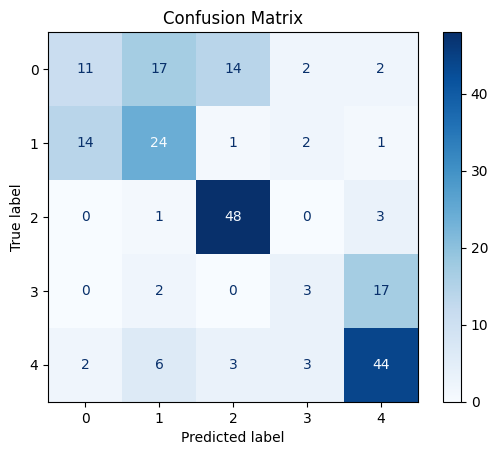

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# **XGBoost (for Stress Level)**

In [ ]:
import xgboost as xgb

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
import numpy as np

mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:05:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.30      0.22      0.25        46
           1       0.46      0.50      0.48        42
           2       0.72      0.88      0.79        52
           3       0.32      0.32      0.32        22
           4       0.67      0.64      0.65        58

    accuracy                           0.55       220
   macro avg       0.49      0.51      0.50       220
weighted avg       0.53      0.55      0.54       220



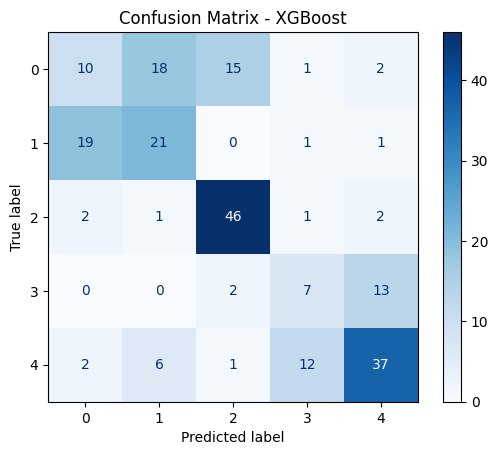

In [ ]:
xgb = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=.2,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# **Random Forest Classifier (For Stress Level)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=30,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)



# Train the classifier on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=30, min_samples_split=20,
                       n_estimators=200, random_state=42)

Accuracy:
0.5863636363636363

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.56      0.90      0.69        42
           2       0.75      0.94      0.84        52
           3       0.26      0.36      0.30        22
           4       0.64      0.59      0.61        58

    accuracy                           0.59       220
   macro avg       0.44      0.56      0.49       220
weighted avg       0.48      0.59      0.52       220



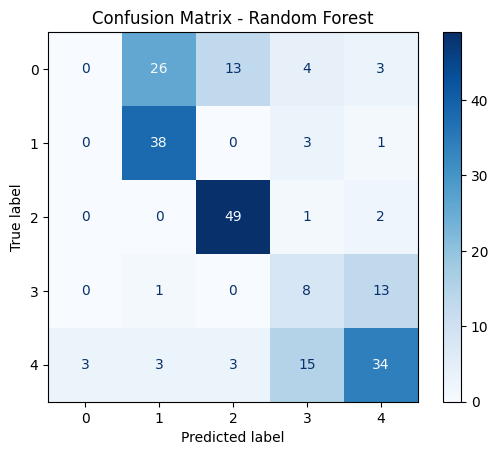

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues"
)
plt.title("Confusion Matrix - Random Forest")
plt.show()


# **Comparison of the 3 models**

                     Accuracy  Precision    Recall  F1-score  AUC
Logistic Regression  0.590909   0.551857  0.590909  0.559264  NaN
Random Forest        0.586364   0.479798  0.586364  0.521576  NaN
XGBoost              0.550000   0.529575  0.550000  0.535976  NaN


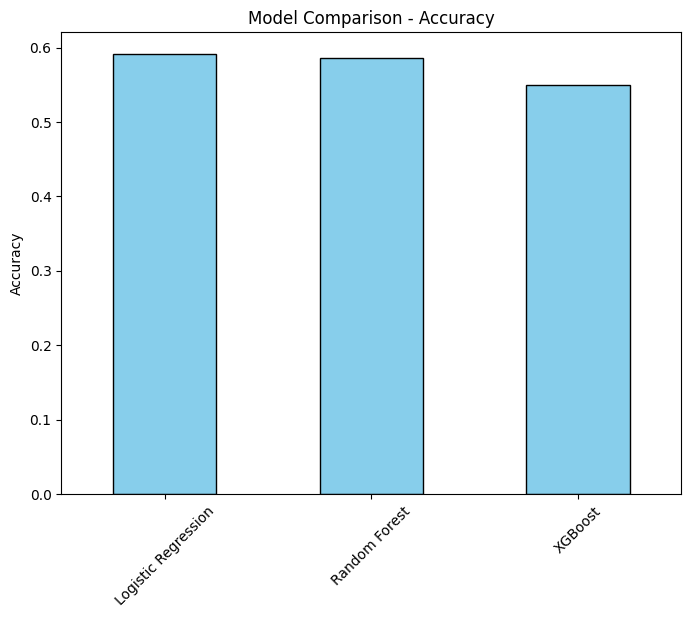

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

results = {}

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rfc,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except:
        auc = np.nan

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
        "AUC": auc
    }

results_df = pd.DataFrame(results).T
print(results_df)

results_df["Accuracy"].plot(kind="bar", figsize=(8,6), color="skyblue", edgecolor="black")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

y_score = model.predict_proba(X_test)

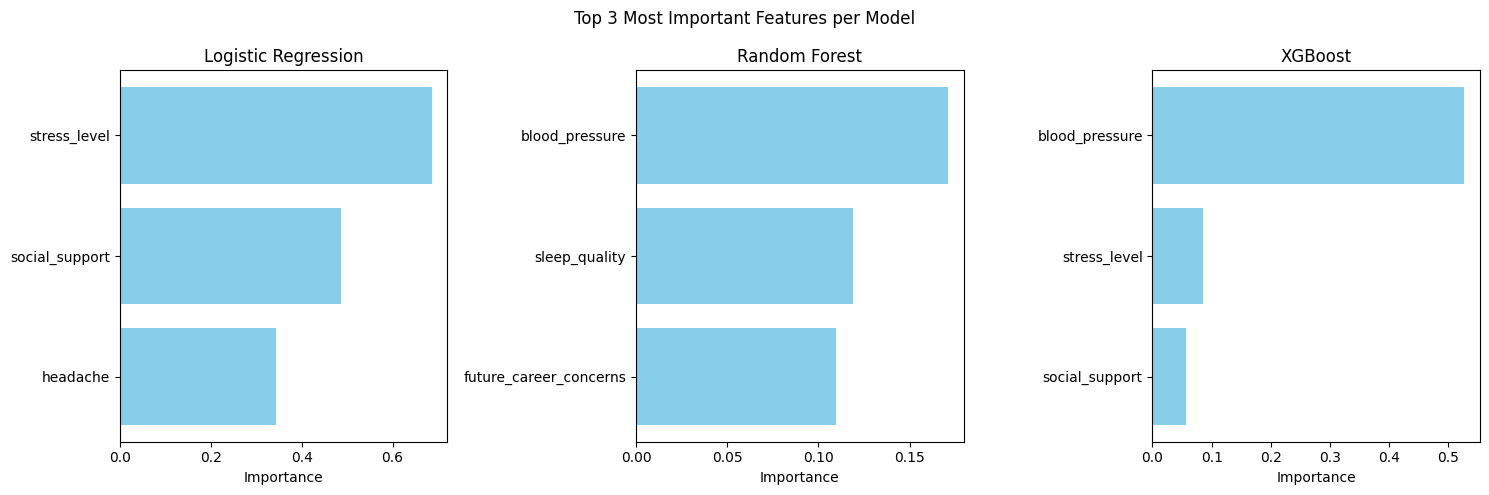

In [ ]:
log_reg_importances = abs(log_reg.coef_[0])
log_reg_features = X.columns
log_reg_top3 = sorted(zip(log_reg_features, log_reg_importances), key=lambda x: x[1], reverse=True)[:3]

rfc_importances = rfc.feature_importances_
rfc_features = X.columns
rfc_top3 = sorted(zip(rfc_features, rfc_importances), key=lambda x: x[1], reverse=True)[:3]

xgb_importances = xgb.feature_importances_
xgb_features = X.columns
xgb_top3 = sorted(zip(xgb_features, xgb_importances), key=lambda x: x[1], reverse=True)[:3]

top_features_df = pd.DataFrame({
    "Logistic Regression": [f"{f}: {round(v,3)}" for f,v in log_reg_top3],
    "Random Forest": [f"{f}: {round(v,3)}" for f,v in rfc_top3],
    "XGBoost": [f"{f}: {round(v,3)}" for f,v in xgb_top3]
})

models = ["Logistic Regression", "Random Forest", "XGBoost"]
top_features = {
    "Logistic Regression": log_reg_top3,
    "Random Forest": rfc_top3,
    "XGBoost": xgb_top3
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, model in zip(axes, models):
    features, scores = zip(*top_features[model])
    ax.barh(features, scores, color="skyblue")
    ax.set_title(model)
    ax.invert_yaxis()
    ax.set_xlabel("Importance")

fig.suptitle("Top 3 Most Important Features per Model")
plt.tight_layout()
plt.show()

# **Exploration Depression Column (PHQ-9)**

/tmp/ipython-input-2153659510.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_counts.index, y=depression_counts.values, palette="Set2")


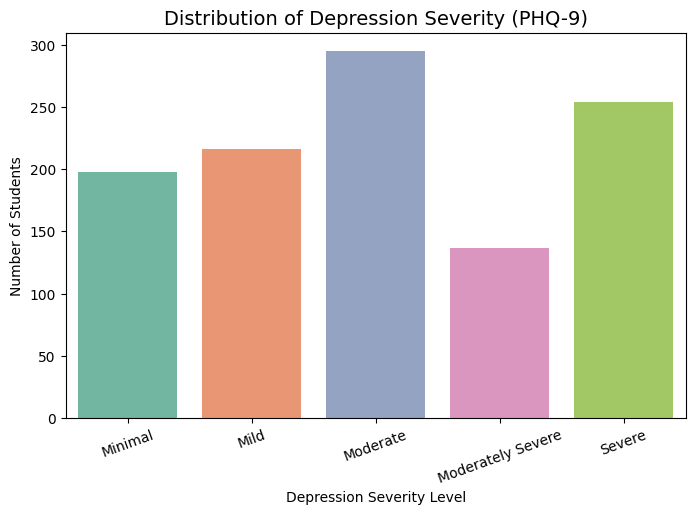

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

phq9_groups = {
    (0, 4): "Minimal",
    (5, 9): "Mild",
    (10, 14): "Moderate",
    (15, 19): "Moderately Severe",
    (20, 27): "Severe"
}

def map_phq9(score):
    for (low, high), label in phq9_groups.items():
        if low <= score <= high:
            return label
    return "Unknown"

df['depression_group'] = df['depression'].apply(map_phq9)

depression_counts = df['depression_group'].value_counts().reindex(
    ["Minimal","Mild","Moderate","Moderately Severe","Severe"]
)

plt.figure(figsize=(8,5))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette="Set2")
plt.title("Distribution of Depression Severity (PHQ-9)", fontsize=14)
plt.ylabel("Number of Students")
plt.xlabel("Depression Severity Level")
plt.xticks(rotation=20)
plt.show()


# **Building Model for Depression Column**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
y = le.fit_transform(df['depression_group'])

X = df.drop(columns=['depression','depression_group'])
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape :", X_pca.shape)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# **Logistic Regression Model (Depression Column)**

Accuracy: 0.5909090909090909
                   precision    recall  f1-score   support

             Mild       0.41      0.24      0.30        46
          Minimal       0.48      0.57      0.52        42
         Moderate       0.73      0.92      0.81        52
Moderately Severe       0.30      0.14      0.19        22
           Severe       0.66      0.76      0.70        58

         accuracy                           0.59       220
        macro avg       0.51      0.53      0.51       220
     weighted avg       0.55      0.59      0.56       220



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

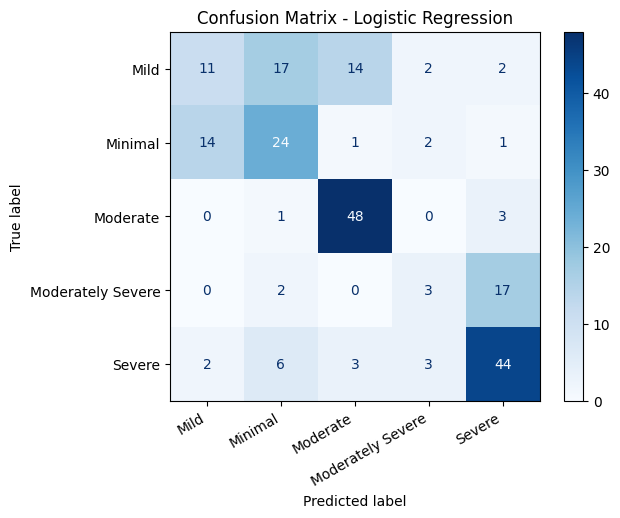

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=le.classes_))


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap="Blues",display_labels=le.classes_)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.title("Confusion Matrix - Logistic Regression")

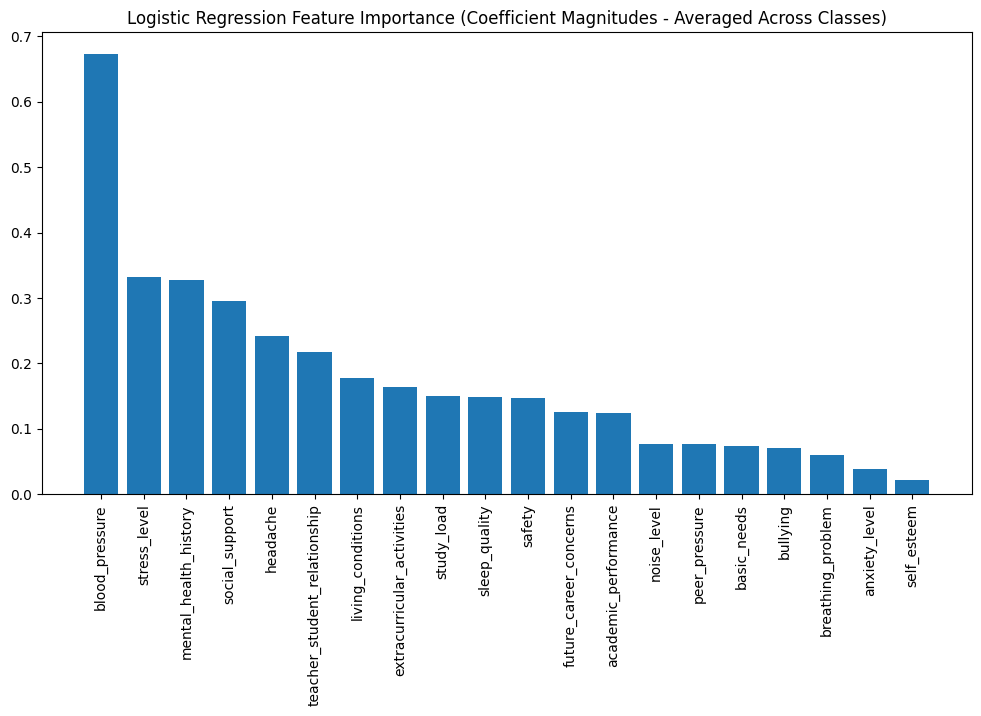

In [ ]:
feature_names = df.drop('depression', axis=1).columns

importances = np.mean(np.abs(log_reg.coef_), axis=0)

indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title("Logistic Regression Feature Importance (Coefficient Magnitudes - Averaged Across Classes)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()

**Logistic Regression Bayes Optimization**

In [ ]:
search_space_log = {
    "solver": Categorical(["saga"]),
    "penalty": Categorical(["l1", "l2", "elasticnet"]),
    "C": Real(1e-3, 1e3, prior="log-uniform"),
    "l1_ratio": Real(0, 1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_bayes = LogisticRegression(max_iter=3000, random_state=42)

log_reg_bayes = BayesSearchCV(
    estimator=log_reg_bayes,
    search_spaces=search_space_log,
    n_iter=30,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    scoring="f1_macro"
)

log_reg_bayes.fit(X_train, y_train)

print("Best params:", log_reg_bayes.best_params_)
print("Best CV score:", log_reg_bayes.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best params: OrderedDict({'C': 0.07380278752738423, 'l1_ratio': 0.9634508432644008, 'penalty': 'l1', 'solver': 'saga'})
Best CV score: 0.50887740827751


Accuracy 0.6136363636363636
                   precision    recall  f1-score   support

             Mild       0.41      0.30      0.35        46
          Minimal       0.51      0.57      0.54        42
         Moderate       0.79      0.92      0.85        52
Moderately Severe       0.50      0.14      0.21        22
           Severe       0.64      0.79      0.71        58

         accuracy                           0.61       220
        macro avg       0.57      0.55      0.53       220
     weighted avg       0.59      0.61      0.58       220



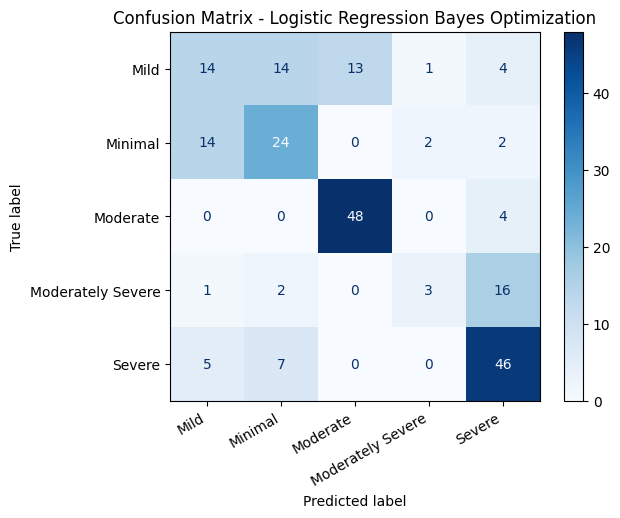

In [ ]:
best_log_reg = log_reg_bayes.best_estimator_

y_pred_log_bayes = best_log_reg.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_log_bayes))
print(classification_report(y_test, y_pred_log_bayes, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_bayes, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression Bayes Optimization")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

**Weighted Logistic Regression**

Accuracy: 0.5818181818181818
                   precision    recall  f1-score   support

             Mild       0.48      0.22      0.30        46
          Minimal       0.50      0.67      0.57        42
         Moderate       0.74      0.92      0.82        52
Moderately Severe       0.34      0.59      0.43        22
           Severe       0.72      0.50      0.59        58

         accuracy                           0.58       220
        macro avg       0.56      0.58      0.54       220
     weighted avg       0.59      0.58      0.56       220



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression Weighted')

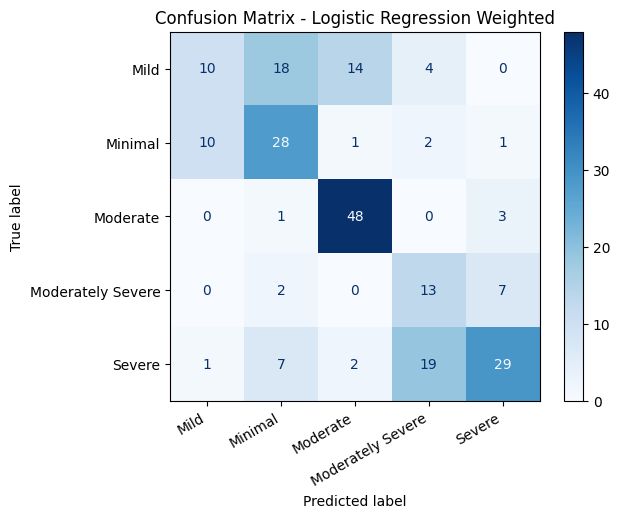

In [ ]:
log_reg_weighted = LogisticRegression(class_weight='balanced',random_state=42)
log_reg_weighted.fit(X_train, y_train)

y_pred_log_weighted = log_reg_weighted.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log_weighted))
print(classification_report(y_test, y_pred_log_weighted, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_weighted, cmap="Blues",display_labels=le.classes_)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.title("Confusion Matrix - Logistic Regression Weighted")

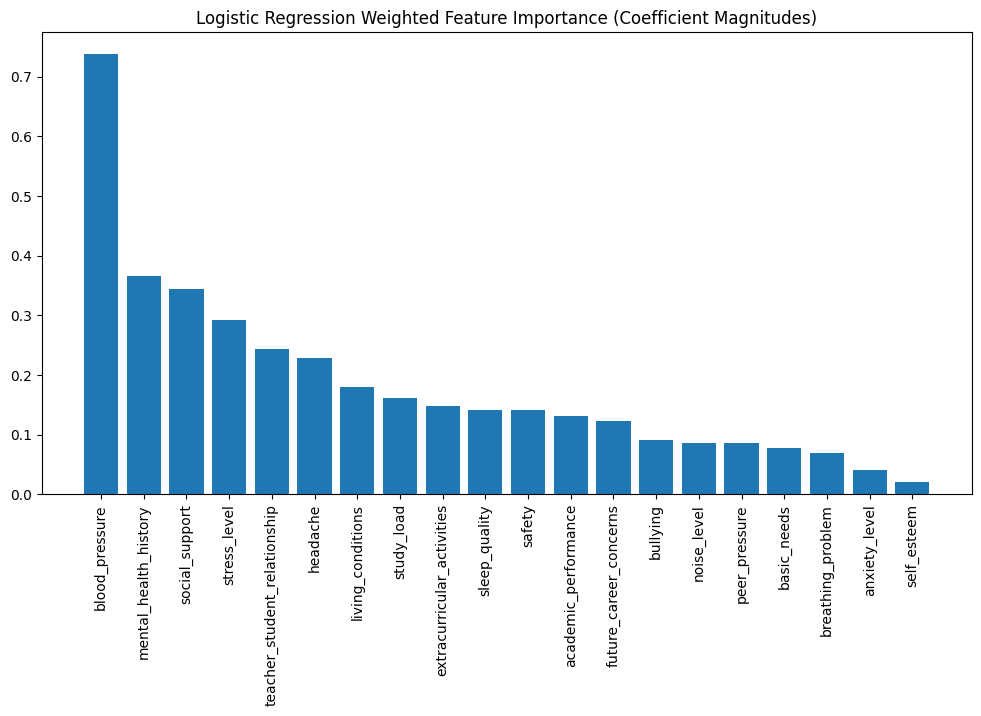

In [ ]:
feature_names = df.drop('depression', axis=1).columns

importances = np.mean(np.abs(log_reg_weighted.coef_), axis=0)

indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title("Logistic Regression Weighted Feature Importance (Coefficient Magnitudes)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()


In [ ]:
search_space_log = {
    "solver": Categorical(["saga"]),
    "penalty": Categorical(["l1", "l2", "elasticnet"]),
    "C": Real(1e-3, 1e3, prior="log-uniform"),
    "l1_ratio": Real(0, 1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_bayes_weighted = LogisticRegression(max_iter=3000, random_state=42)

log_reg_bayes_weighted = BayesSearchCV(
    estimator=log_reg_bayes_weighted,
    search_spaces=search_space_log,
    n_iter=30,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    scoring="f1_macro"
)

log_reg_bayes_weighted = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)

log_reg_bayes_weighted = BayesSearchCV(estimator=log_reg_bayes_weighted, search_spaces=search_space_log, n_iter=30, cv=cv, n_jobs=-1, verbose=2,scoring="f1_macro")

log_reg_bayes_weighted.fit(X_train, y_train)
print("Best params:", log_reg_bayes_weighted.best_params_)
print("Best CV score:", log_reg_bayes_weighted.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best params: OrderedDict({'C': 0.022180642958324056, 'l1_ratio': 0.0720901976820081, 'penalty': 'l1', 'solver': 'saga'})
Best CV score: 0.5185457685907902


Test Accuracy: 0.5954545454545455
                   precision    recall  f1-score   support

             Mild       0.46      0.24      0.31        46
          Minimal       0.60      0.81      0.69        42
         Moderate       0.79      0.92      0.85        52
Moderately Severe       0.29      0.45      0.36        22
           Severe       0.64      0.48      0.55        58

         accuracy                           0.60       220
        macro avg       0.55      0.58      0.55       220
     weighted avg       0.59      0.60      0.58       220



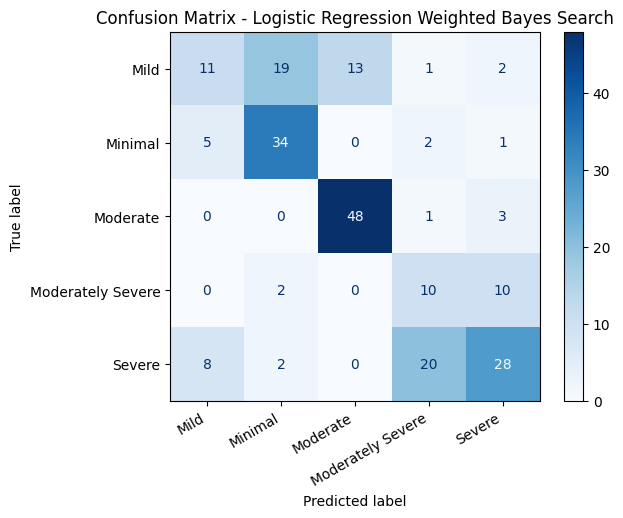

In [ ]:
best_log_reg_weighted = log_reg_bayes_weighted.best_estimator_

y_pred_log_weighted_bayes = best_log_reg_weighted.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_log_weighted_bayes))
print(classification_report(y_test, y_pred_log_weighted_bayes, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_weighted_bayes, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression Weighted Bayes Search")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

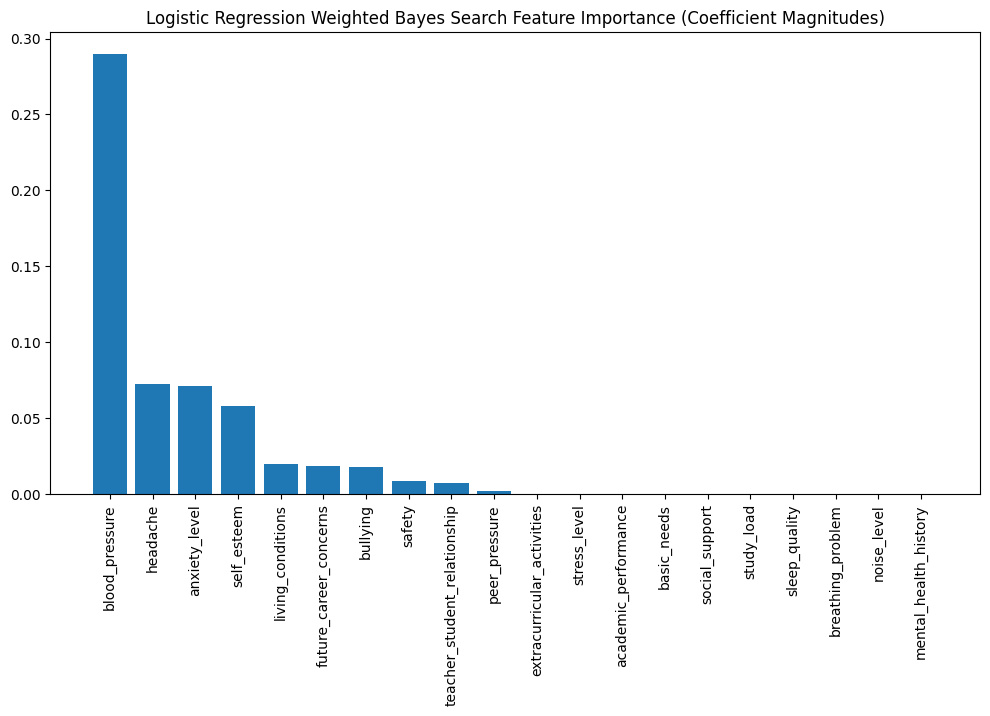

In [ ]:
feature_names = df.drop('depression', axis=1).columns

importances = np.mean(np.abs(best_log_reg_weighted.coef_), axis=0)

indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title("Logistic Regression Weighted Bayes Search Feature Importance (Coefficient Magnitudes)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()


Applying SMOTE

In [ ]:
print(pd.Series(y).value_counts())


2    295
4    254
0    216
1    198
3    137
Name: count, dtype: int64


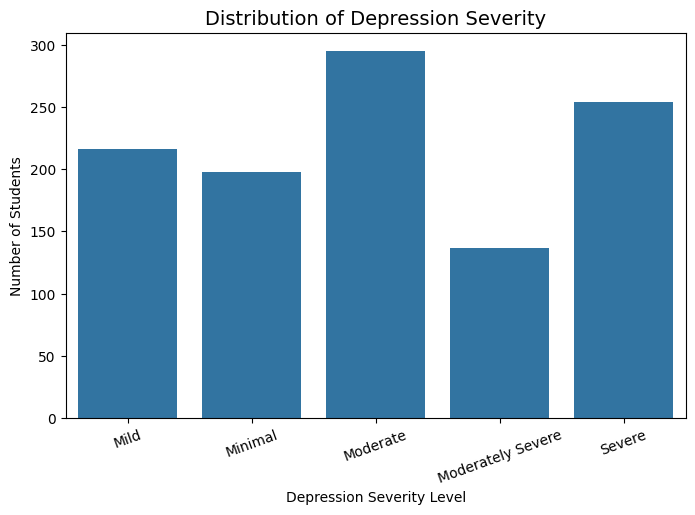

In [ ]:
counts_before_smote = pd.Series(y).value_counts().sort_index()

labels = le.inverse_transform(counts_before_smote.index)

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=counts_before_smote.values)
plt.title("Distribution of Depression Severity", fontsize=14)
plt.ylabel("Number of Students")
plt.xlabel("Depression Severity Level")
plt.xticks(rotation=20)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_labels_res  = le.inverse_transform(y_train_res)

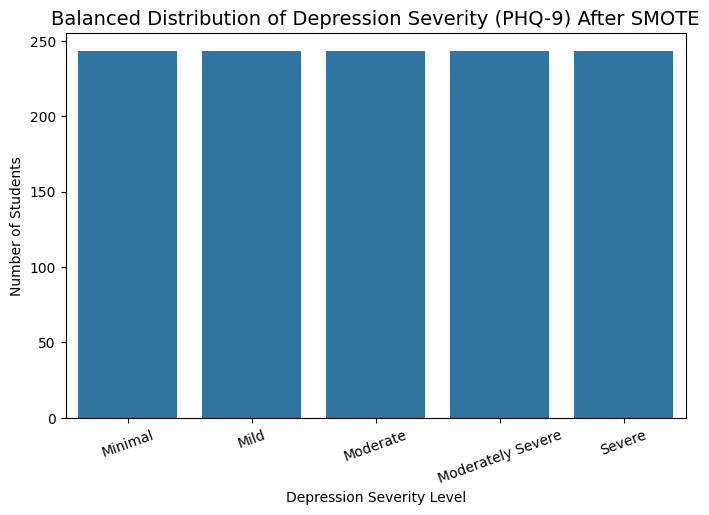

In [ ]:
balanced_counts = pd.Series(y_labels_res).value_counts().reindex(
    ["Minimal","Mild","Moderate","Moderately Severe","Severe"]
)

plt.figure(figsize=(8,5))
sns.barplot(x=balanced_counts.index, y=balanced_counts.values)
plt.title("Balanced Distribution of Depression Severity (PHQ-9) After SMOTE", fontsize=14)
plt.ylabel("Number of Students")
plt.xlabel("Depression Severity Level")
plt.xticks(rotation=20)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.55
                   precision    recall  f1-score   support

             Mild       0.41      0.24      0.30        46
          Minimal       0.48      0.57      0.52        42
         Moderate       0.73      0.92      0.81        52
Moderately Severe       0.30      0.14      0.19        22
           Severe       0.66      0.76      0.70        58

         accuracy                           0.59       220
        macro avg       0.51      0.53      0.51       220
     weighted avg       0.55      0.59      0.56       220



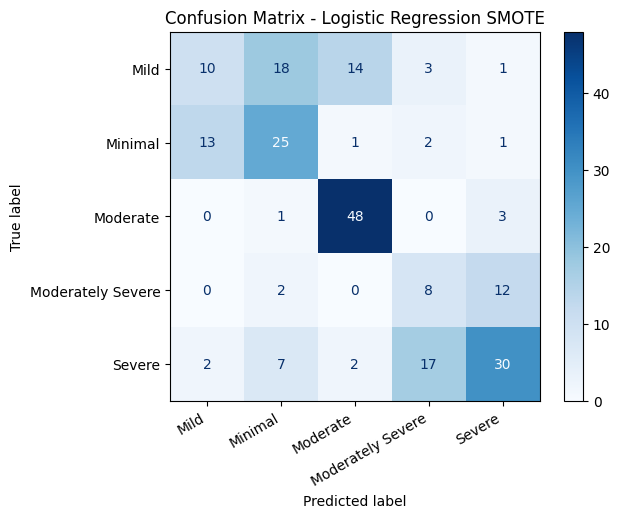

In [ ]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_res, y_train_res)

y_pred_log_smote = log_reg_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log_smote))
print(classification_report(y_test, y_pred_log, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_smote, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression SMOTE")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

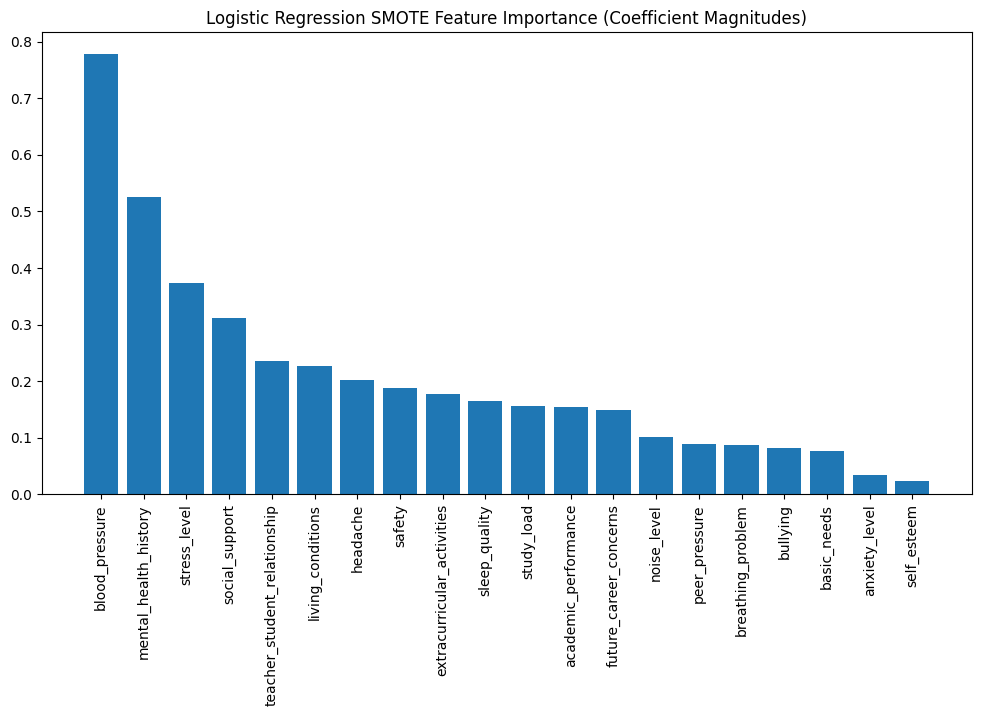

In [ ]:
feature_names = df.drop('depression', axis=1).columns

importances = np.mean(np.abs(log_reg_smote.coef_), axis=0)

indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title("Logistic Regression SMOTE Feature Importance (Coefficient Magnitudes)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()

In [ ]:
search_space_log = {
    "solver": Categorical(["saga"]),
    "penalty": Categorical(["l1", "l2", "elasticnet"]),
    "C": Real(1e-3, 1e3, prior="log-uniform"),
    "l1_ratio": Real(0, 1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_bayes_smote = LogisticRegression(max_iter=3000, random_state=42)

log_reg_bayes_smote = BayesSearchCV(
    estimator=log_reg_bayes_smote,
    search_spaces=search_space_log,
    n_iter=30,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    scoring="f1_macro"
)

log_reg_bayes_smote = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)

log_reg_bayes_smote = BayesSearchCV(estimator=log_reg_bayes_smote, search_spaces=search_space_log, n_iter=30, cv=cv, n_jobs=-1, verbose=2,scoring="f1_macro")

log_reg_bayes_smote.fit(X_train_res, y_train_res)
print("Best params:", log_reg_bayes_smote.best_params_)
print("Best CV score:", log_reg_bayes_smote.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best params: OrderedDict({'C': 26.4707834456719, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'saga'})
Best CV score: 0.5952584307000064


Test Accuracy: 0.5681818181818182
              precision    recall  f1-score   support

           0       0.42      0.24      0.31        46
           1       0.50      0.64      0.56        42
           2       0.74      0.92      0.82        52
           3       0.28      0.36      0.31        22
           4       0.67      0.53      0.60        58

    accuracy                           0.57       220
   macro avg       0.52      0.54      0.52       220
weighted avg       0.56      0.57      0.55       220



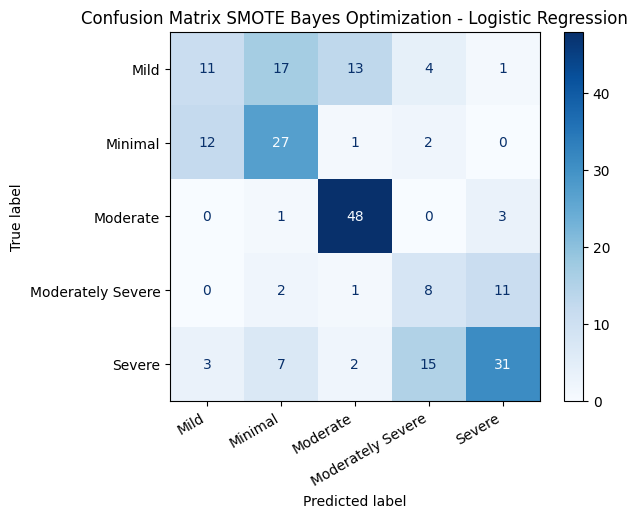

In [ ]:
best_log_reg_smote = log_reg_bayes_smote.best_estimator_

y_pred_log_weighted_bayes = best_log_reg_smote.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_log_weighted_bayes))
print(classification_report(y_test, y_pred_log_weighted_bayes))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_weighted_bayes, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix SMOTE Bayes Optimization - Logistic Regression")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

# **Random Forest Classifier (Depression Column)**

In [ ]:
search_space_rf = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 100),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(50, 100),
    'max_features': Real(0.2, 1.0),
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'bootstrap': Categorical([True, False])
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

bayes_search_rf = BayesSearchCV(estimator=rf, search_spaces=search_space_rf, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring="f1_macro")
bayes_search_rf.fit(X_train, y_train)

print("Best params:", bayes_search_rf.best_params_)
print("Best score:", bayes_search_rf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_rf = bayes_search_rf.best_estimator_
y_pred_rfc_bayes = best_rf.predict(X_test)

Accuracy: 0.6045454545454545
                   precision    recall  f1-score   support

             Mild       0.35      0.28      0.31        46
          Minimal       0.54      0.33      0.41        42
         Moderate       0.79      0.92      0.85        52
Moderately Severe       0.00      0.00      0.00        22
           Severe       0.60      1.00      0.75        58

         accuracy                           0.60       220
        macro avg       0.46      0.51      0.47       220
     weighted avg       0.52      0.60      0.54       220



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


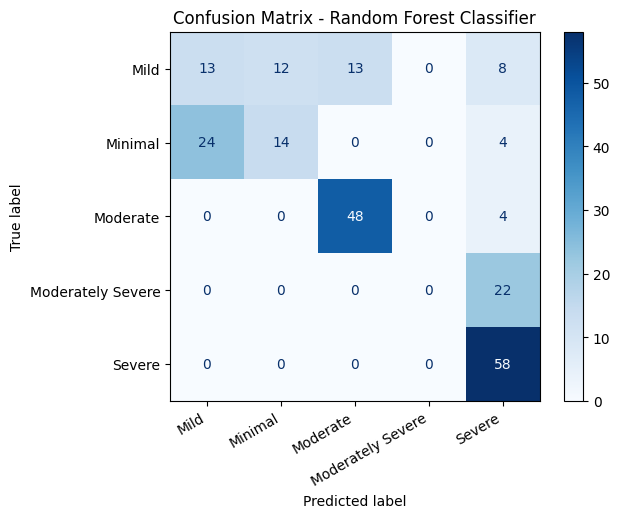

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print("Accuracy:", accuracy_score(y_test, y_pred_rfc_bayes))
print(classification_report(y_test, y_pred_rfc_bayes, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rfc_bayes,
    cmap="Blues",
    display_labels=le.classes_
)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()


**RFC Weighted**

In [ ]:
search_space_rf_weighted = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 100),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(3, 100),
    'max_features': Real(0.2, 1.0),
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'bootstrap': Categorical([True, False])
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_weighted = RandomForestClassifier(class_weight="balanced",random_state=42)

bayes_search_rf_weighted = BayesSearchCV(estimator=rf_weighted, search_spaces=search_space_rf_weighted, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring="f1_macro")
bayes_search_rf_weighted.fit(X_train, y_train)

print("Best params:", bayes_search_rf_weighted.best_params_)
print("Best score:", bayes_search_rf_weighted.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_rf_weighted = bayes_search_rf_weighted.best_estimator_
y_pred_rfc_weighted = best_rf_weighted.predict(X_test)

Accuracy: 0.5227272727272727
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        46
           1       0.41      0.43      0.42        42
           2       0.72      0.90      0.80        52
           3       0.33      0.41      0.37        22
           4       0.67      0.55      0.60        58

    accuracy                           0.52       220
   macro avg       0.48      0.50      0.48       220
weighted avg       0.51      0.52      0.51       220



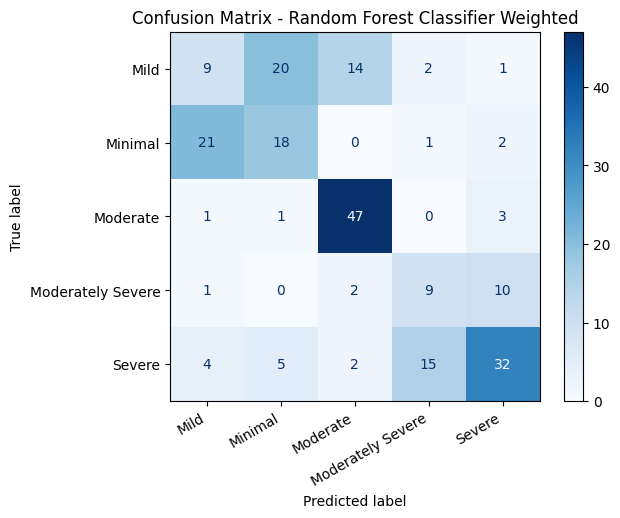

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rfc_weighted))
print(classification_report(y_test, y_pred_rfc_weighted))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc_weighted, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix - Random Forest Classifier Weighted")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

RFC SMOTE

In [ ]:
search_space_rf = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 100),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 100),
    'max_features': Real(0.2, 1.0),
    'criterion': Categorical(['gini', 'entropy', 'log_loss']),
    'bootstrap': Categorical([True, False])
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

bayes_search_rf_smote = BayesSearchCV(estimator=rf, search_spaces=search_space_rf, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring="f1_macro")
bayes_search_rf_smote.fit(X_train_res, y_train_res)

print("Best params:", bayes_search_rf_smote.best_params_)
print("Best score:", bayes_search_rf_smote.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_rf_smote = bayes_search_rf_smote.best_estimator_
y_pred_rfc_smote = best_rf_smote.predict(X_test)

Accuracy: 0.5409090909090909
              precision    recall  f1-score   support

           0       0.38      0.28      0.33        46
           1       0.48      0.50      0.49        42
           2       0.75      0.92      0.83        52
           3       0.25      0.32      0.28        22
           4       0.60      0.52      0.56        58

    accuracy                           0.54       220
   macro avg       0.49      0.51      0.50       220
weighted avg       0.53      0.54      0.53       220



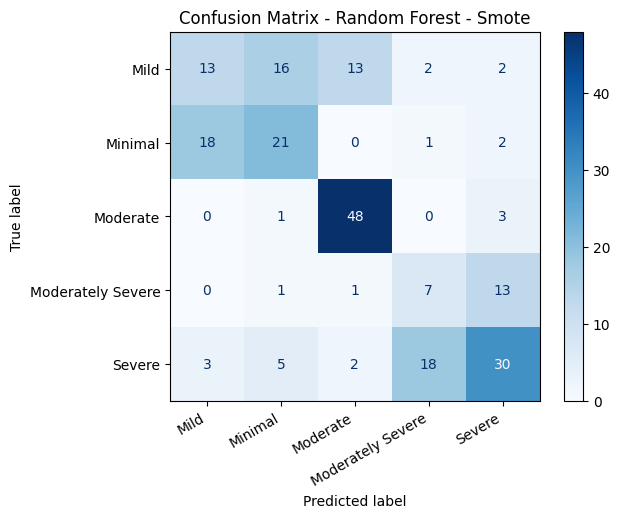

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rfc_smote ))
print(classification_report(y_test, y_pred_rfc_smote ))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc_smote, cmap="Blues",display_labels=le.classes_)
plt.title("Confusion Matrix - Random Forest - Smote")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.show()

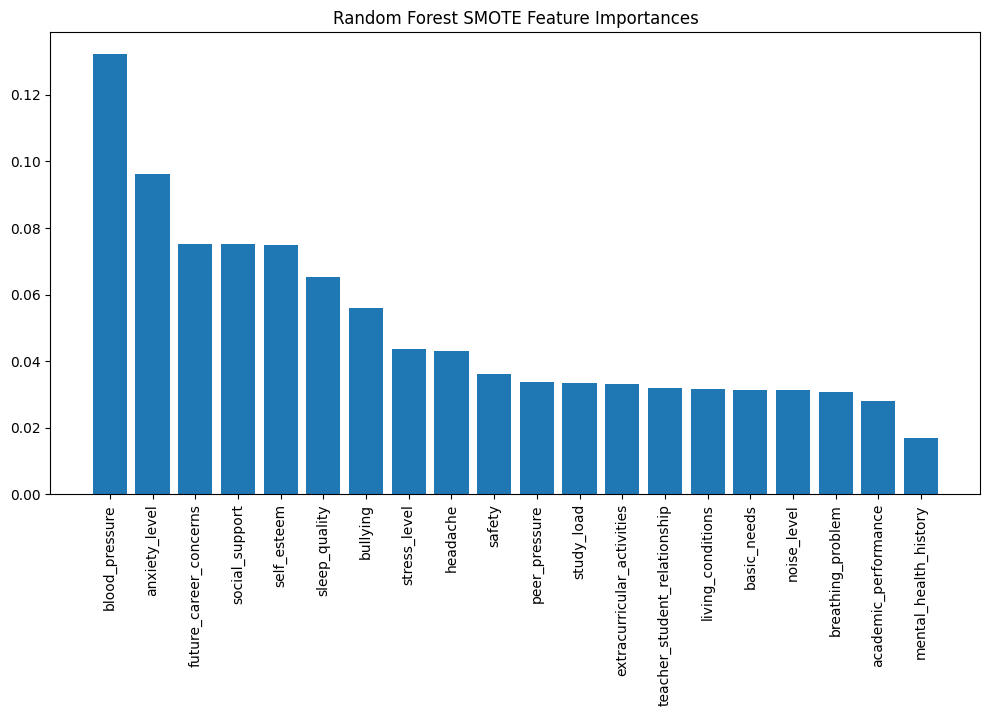

In [ ]:
importances = best_rf_smote.feature_importances_

indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title("Random Forest SMOTE Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()


# **XGBoost Classification (Depression Column)**

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define search space
search_space = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.05, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 20),
    'max_delta_step': Integer(1, 10),
    'scale_pos_weight': Integer(1,5),
    'lambda': Integer(1, 5),
    'scale_pos_weight': Integer(1, 5),
    'colsample_bytree': Real(0.5, 1.0)
}

# Create XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, objective='multi:softprob',num_class=5, random_state=42)

# Perform Bayesian optimization
bayes_search = BayesSearchCV(estimator=xgb_clf, search_spaces=search_space, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring='f1_macro')
bayes_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best score: {bayes_search.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
best_model_xgb = bayes_search.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

Accuracy: 0.5590909090909091
                   precision    recall  f1-score   support

             Mild       0.34      0.30      0.32        46
          Minimal       0.44      0.43      0.43        42
         Moderate       0.77      0.92      0.84        52
Moderately Severe       0.29      0.18      0.22        22
           Severe       0.63      0.67      0.65        58

         accuracy                           0.56       220
        macro avg       0.49      0.50      0.49       220
     weighted avg       0.53      0.56      0.54       220



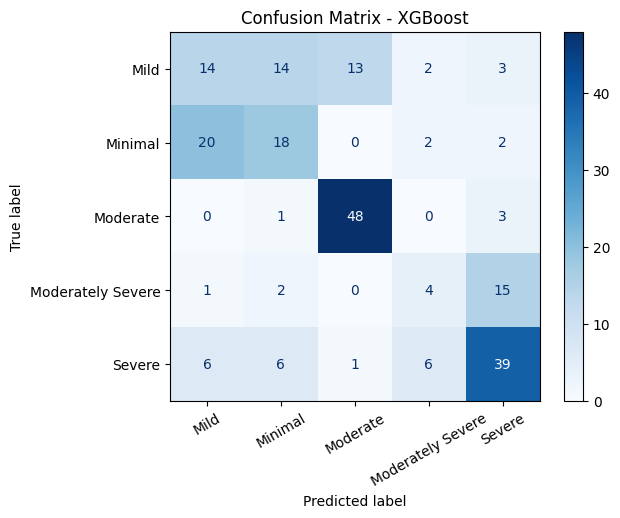

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb,
    cmap="Blues",
    display_labels=le.classes_
)
plt.xticks(rotation=30)  # rotate x-axis tick labels 30 degrees
plt.title("Confusion Matrix - XGBoost")
plt.show()


**XGB Weighted**

In [ ]:
weights = compute_sample_weight(class_weight="balanced", y=y_train)

search_space_weighted = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.05, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 20),
    'max_delta_step': Integer(1, 10),
    'lambda': Integer(1, 5),
    'scale_weight': Integer(1, 5),
    'reg_lambda': Real(1e-3, 10, prior='log-uniform'),
    'reg_alpha': Real(1e-3, 10, prior='log-uniform'),
    'colsample_bytree': Real(0.5, 1.0)
  }

xgb_clf_weighted = XGBClassifier(n_estimators=100, objective='multi:softprob',num_class=5, random_state=42)

bayes_search_weighted = BayesSearchCV(estimator=xgb_clf_weighted, search_spaces=search_space_weighted, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring='f1_macro')
bayes_search_weighted.fit(X_train, y_train, sample_weight=weights)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:15:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_poli...
                             'min_child_weight': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0.001, high=10, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=0.001, high=10, prior='log-uniform', transform='normalize'),
                             'scale_weight': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
best_model_xgb_weighted = bayes_search_weighted.best_estimator_
y_pred_xgb_weighted = best_model_xgb_weighted.predict(X_test)

Accuracy: 0.5636363636363636
                   precision    recall  f1-score   support

             Mild       0.32      0.22      0.26        46
          Minimal       0.53      0.62      0.57        42
         Moderate       0.79      0.92      0.85        52
Moderately Severe       0.29      0.45      0.36        22
           Severe       0.67      0.52      0.58        58

         accuracy                           0.56       220
        macro avg       0.52      0.55      0.52       220
     weighted avg       0.56      0.56      0.55       220



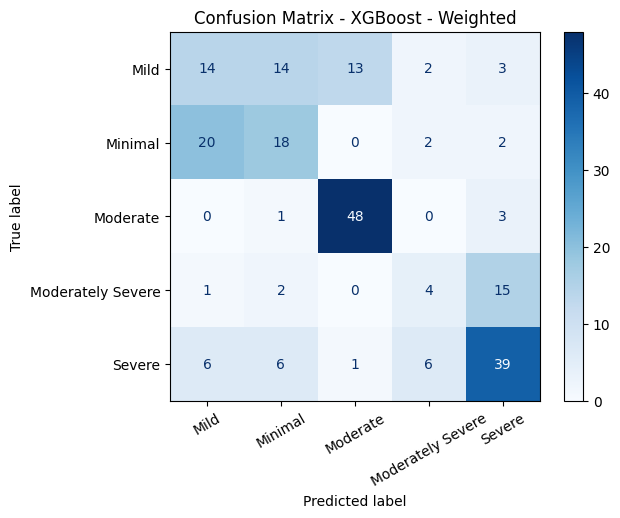

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_weighted))
print(classification_report(y_test, y_pred_xgb_weighted, target_names=le.classes_))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb,
    cmap="Blues",
    display_labels=le.classes_
)
plt.xticks(rotation=30)
plt.title("Confusion Matrix - XGBoost - Weighted")
plt.show()


**XGB SMOTE**

In [ ]:
search_space_smote = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.05, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 20),
    'lambda': Integer(1, 5),
    'reg_lambda': Real(1e-3, 10, prior='log-uniform'),
    'reg_alpha': Real(1e-3, 10, prior='log-uniform'),
    'colsample_bytree': Real(0.5, 1.0)
  }

xgb_clf_smote = XGBClassifier(n_estimators=100, objective='multi:softprob',num_class=5, random_state=42)

# Perform Bayesian optimization
bayes_search_xgb_smote = BayesSearchCV(estimator=xgb_clf_smote, search_spaces=search_space_smote, n_iter=25, cv=cv, n_jobs=-1, verbose=2, scoring='f1_macro')
bayes_search_xgb_smote.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {bayes_search_xgb_smote.best_params_}")
print(f"Best score: {bayes_search_xgb_smote.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_model_xgb_smote = bayes_search_xgb_smote.best_estimator_
y_pred_xgb_smote = best_model_xgb_smote.predict(X_test)

Accuracy: 0.5590909090909091
                   precision    recall  f1-score   support

             Mild       0.34      0.30      0.32        46
          Minimal       0.51      0.45      0.48        42
         Moderate       0.75      0.92      0.83        52
Moderately Severe       0.23      0.14      0.17        22
           Severe       0.60      0.67      0.63        58

         accuracy                           0.56       220
        macro avg       0.49      0.50      0.49       220
     weighted avg       0.53      0.56      0.54       220



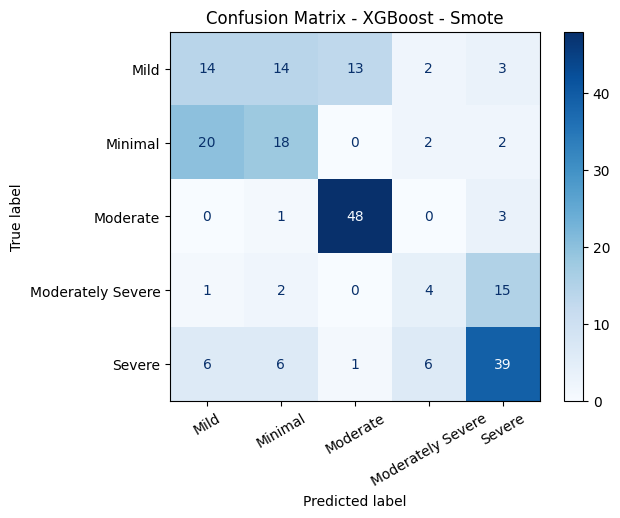

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print(classification_report(y_test, y_pred_xgb_smote, target_names=le.classes_))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb,
    cmap="Blues",
    display_labels=le.classes_
)
plt.xticks(rotation=30)
plt.title("Confusion Matrix - XGBoost - Smote")
plt.show()


# **Comparison of the Three Models (Depression Column)**


Logistic Regression
Accuracy: 0.5909090909090909
Macro F1: 0.5116829433834205
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        46
           1       0.47      0.50      0.48        42
           2       0.73      0.92      0.81        52
           3       0.33      0.14      0.19        22
           4       0.65      0.74      0.69        58

    accuracy                           0.59       220
   macro avg       0.52      0.53      0.51       220
weighted avg       0.56      0.59      0.57       220


Logistic Regression (Weighted)
Accuracy: 0.5954545454545455
Macro F1: 0.5513748776528578
              precision    recall  f1-score   support

           0       0.46      0.24      0.31        46
           1       0.60      0.81      0.69        42
           2       0.79      0.92      0.85        52
           3       0.29      0.45      0.36        22
           4       0.64      0.48      0.55        58

    accuracy    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (SMOTE)
Accuracy: 0.5409090909090909
Macro F1: 0.49530277109507265
              precision    recall  f1-score   support

           0       0.38      0.28      0.33        46
           1       0.48      0.50      0.49        42
           2       0.75      0.92      0.83        52
           3       0.25      0.32      0.28        22
           4       0.60      0.52      0.56        58

    accuracy                           0.54       220
   macro avg       0.49      0.51      0.50       220
weighted avg       0.53      0.54      0.53       220


Random Forest (Weighted)
Accuracy: 0.5227272727272727
Macro F1: 0.4825312346769432
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        46
           1       0.41      0.43      0.42        42
           2       0.72      0.90      0.80        52
           3       0.33      0.41      0.37        22
           4       0.67      0.55      0.60        58

    accuracy       

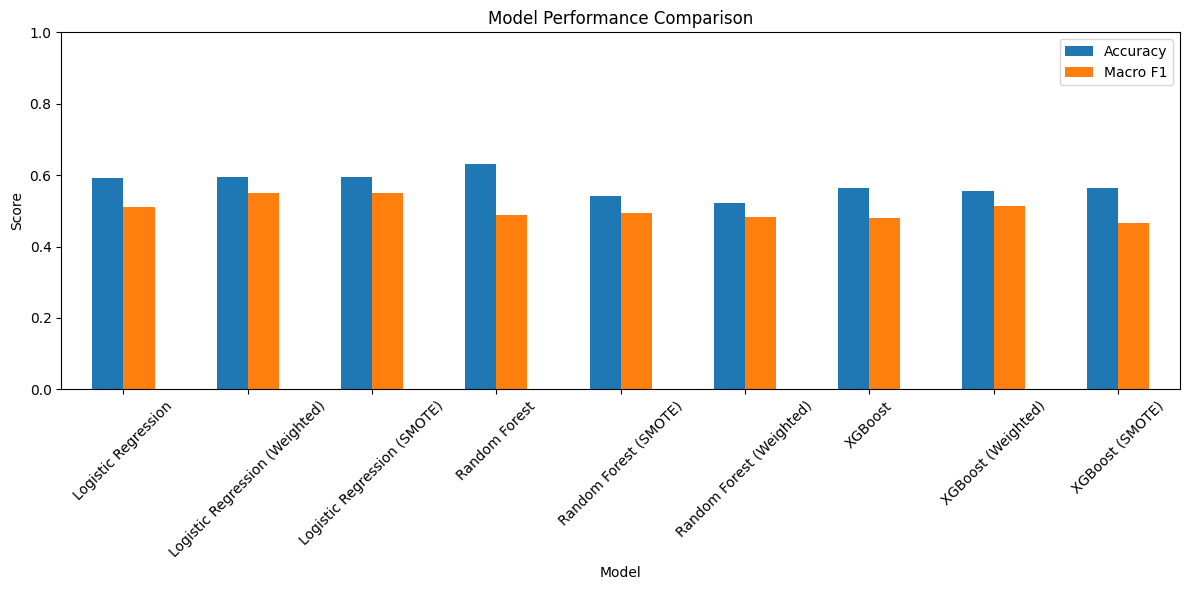

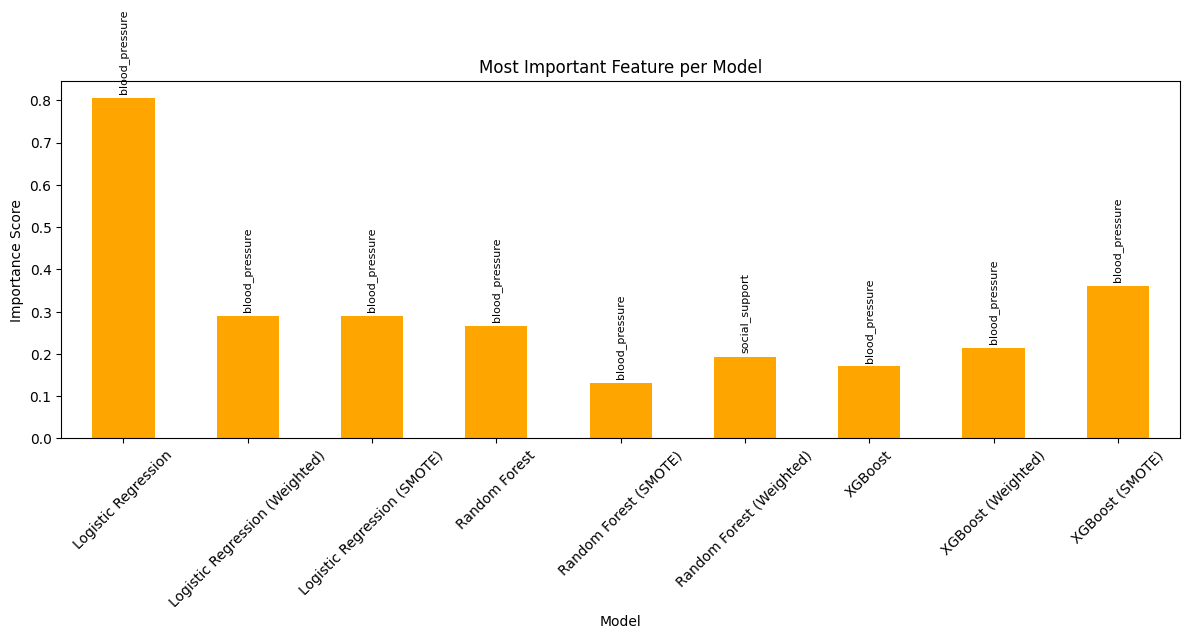

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": best_log_reg,
    "Logistic Regression (Weighted)": best_log_reg_weighted,
    "Logistic Regression (SMOTE)": best_log_reg_smote,
    "Random Forest": best_rf,
    "Random Forest (SMOTE)": best_rf_smote,
    "Random Forest (Weighted)": best_rf_weighted,
    "XGBoost": best_model_xgb,
    "XGBoost (Weighted)": best_model_xgb_weighted,
    "XGBoost (SMOTE)": best_model_xgb_smote
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    results.append((name, acc, f1))
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Macro F1:", f1)
    print(classification_report(y_test, y_pred))

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Macro F1"])
print("\nPerformance Results:")
print(df_results)

def top_features_logistic(model, feature_names, top_n=1):
    coefs = np.mean(np.abs(model.coef_), axis=0)
    top_idx = np.argsort(coefs)[::-1][:top_n]
    return [(feature_names[i], coefs[i]) for i in top_idx]

def top_features_tree(model, feature_names, top_n=1):
    importances = model.feature_importances_
    top_idx = np.argsort(importances)[::-1][:top_n]
    return [(feature_names[i], importances[i]) for i in top_idx]

feature_importance_results = {}
for name, model in models.items():
    if "Logistic Regression" in name:
        feature_importance_results[name] = top_features_logistic(model, X_train.columns)
    elif "Random Forest" in name or "XGBoost" in name:
        feature_importance_results[name] = top_features_tree(model, X_train.columns)

# Put in DataFrame
importance_df = pd.DataFrame([
    {"Model": model, "Top Feature": feats[0][0], "Importance": feats[0][1]}
    for model, feats in feature_importance_results.items()
])


df_results.set_index("Model")[["Accuracy", "Macro F1"]].plot(
    kind="bar", figsize=(12,6), rot=45
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

ax = importance_df.set_index("Model")["Importance"].plot(
    kind="bar", figsize=(12,6), rot=45, color="orange"
)
plt.title("Most Important Feature per Model")
plt.ylabel("Importance Score")
plt.tight_layout()

for i, (model, row) in enumerate(importance_df.set_index("Model").iterrows()):
    ax.text(i, row["Importance"] + 0.01, row["Top Feature"],
            ha="center", va="bottom", fontsize=8, rotation=90)

plt.show()
